In [1]:
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

def showtwo(left, right):
  plt.subplot(1, 2, 1)
  plt.imshow(left)
  plt.subplot(1, 2, 2)
  plt.imshow(right)
  plt.show()

In [3]:
image=Image.open('test.jpg')
width = image.width
height = image.height
width, height

(8000, 4512)

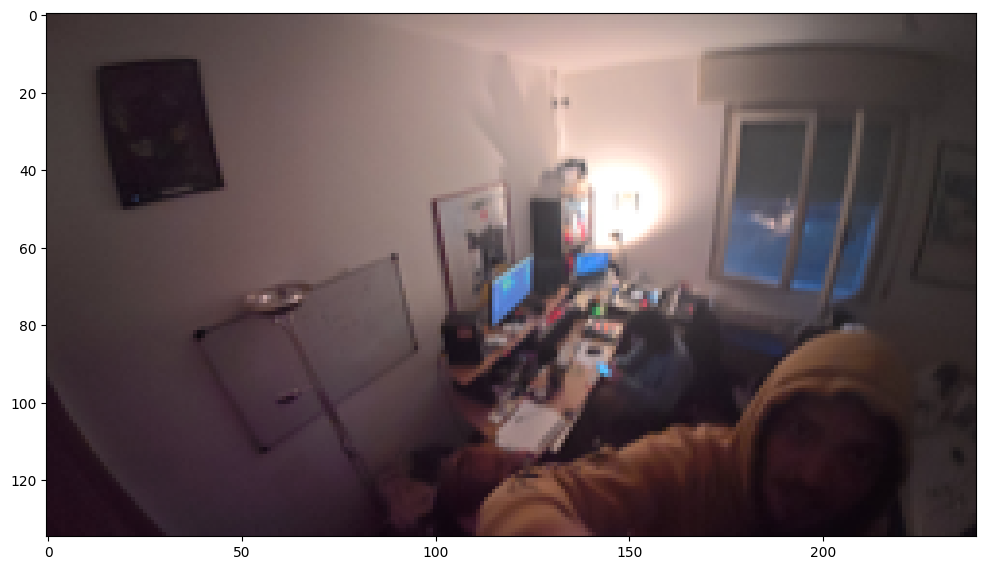

In [4]:
height = int(image.height * 240 / image.width)
width = 240
image = image.resize((width, height))
plt.imshow(image)

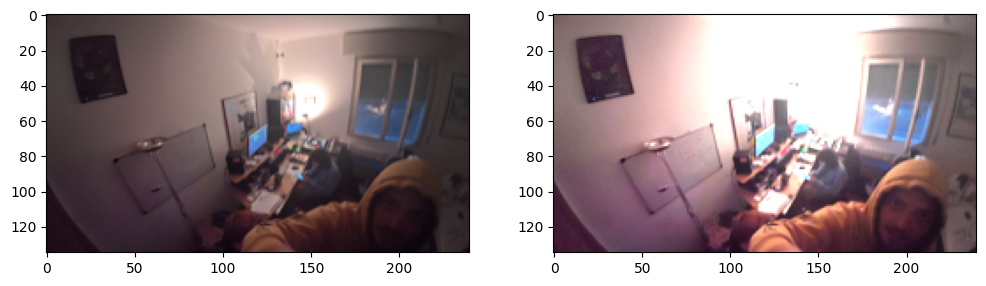

In [10]:
image2 = Image.new("RGB", (width, height))

brightness = 2
for x in range(width):
  for y in range(height):
    oldpixel = image.getpixel((x, y))
    newpixel = (int(min(oldpixel[0] * brightness, 255)),
              int(min(oldpixel[1] * brightness, 255)),
              int(min(oldpixel[2] * brightness, 255))) 
    image2.putpixel((x, y), newpixel)
showtwo(image, image2)
  

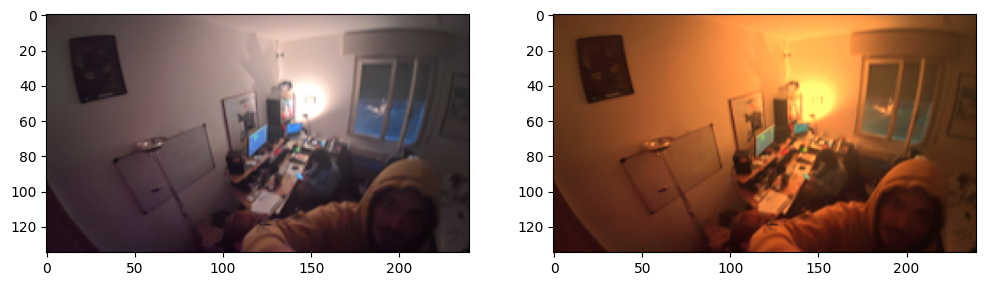

In [ ]:
# rebalance levels
image2 = Image.new("RGB", (width, height))
for x in range(width):
  for y in range(height):
    oldpixel = image.getpixel((x, y))
    newpixel = (int(min(oldpixel[0] * 1.5, 255)),
              oldpixel[1],
              int(oldpixel[2] * 0.5)) 
    image2.putpixel((x, y), newpixel)
showtwo(image, image2)

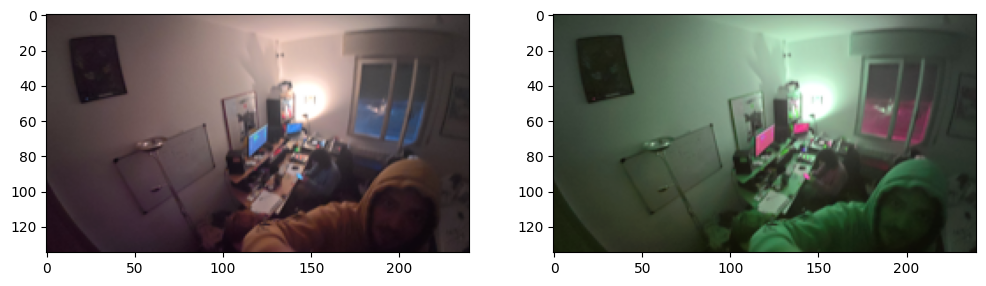

In [14]:
image2 = Image.new("RGB", (width, height))
for x in range(width):
  for y in range(height):
    oldpixel = image.getpixel((x, y))
    newpixel = (oldpixel[2], oldpixel[0], oldpixel[1]) 
    image2.putpixel((x, y), newpixel)
showtwo(image, image2)

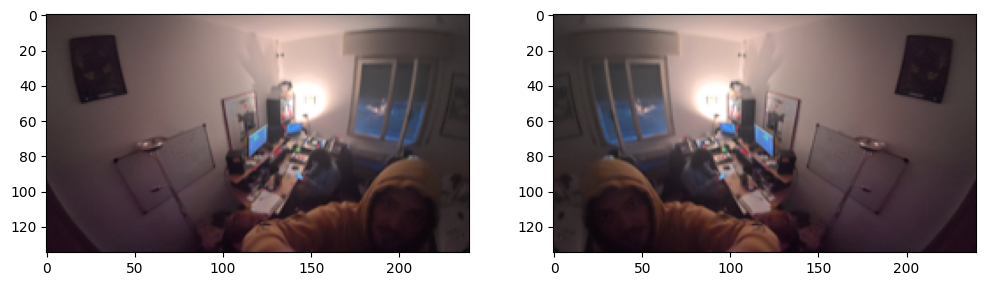

In [15]:
image2 = Image.new("RGB", (width, height))
for x in range(width):
  for y in range(height):
    newpixel = image.getpixel((width - x - 1, y))
    image2.putpixel((x, y), newpixel)
showtwo(image, image2)

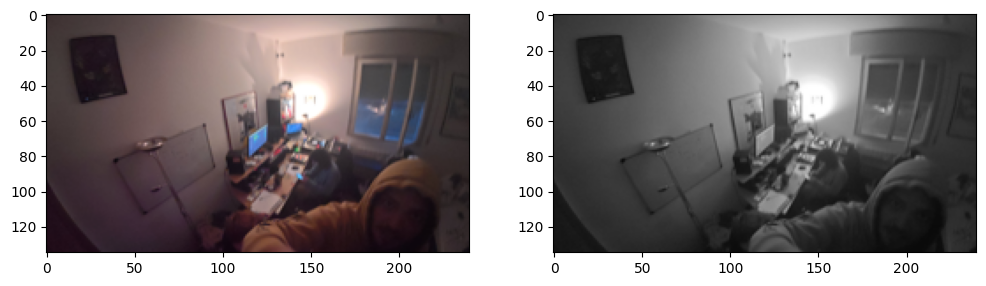

In [16]:
image2 = Image.new("RGB", (width, height))
for x in range(width):
  for y in range(height):
    average = sum(image.getpixel((x, y))) // 3
    image2.putpixel((x, y), (average, average, average))
showtwo(image, image2)

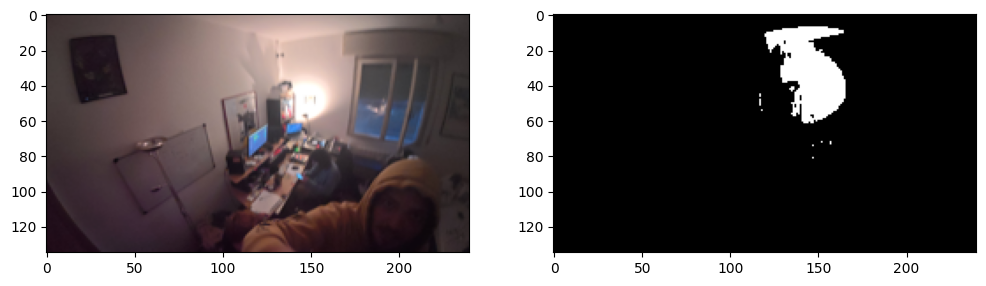

In [17]:
image2 = Image.new("RGB", (width, height))
threshold = 192
for x in range(width):
  for y in range(height):
    average = sum(image.getpixel((x, y))) // 3
    if average >= threshold:
      value = 255
    else:
      value = 0
    image2.putpixel((x, y), (value, value, value))
showtwo(image, image2)

# Jade Filter

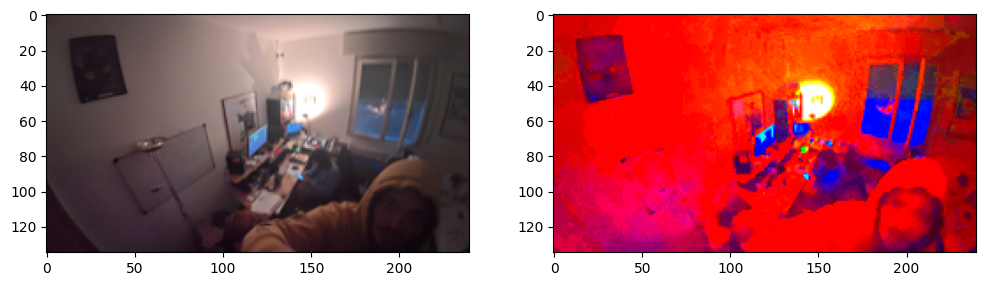

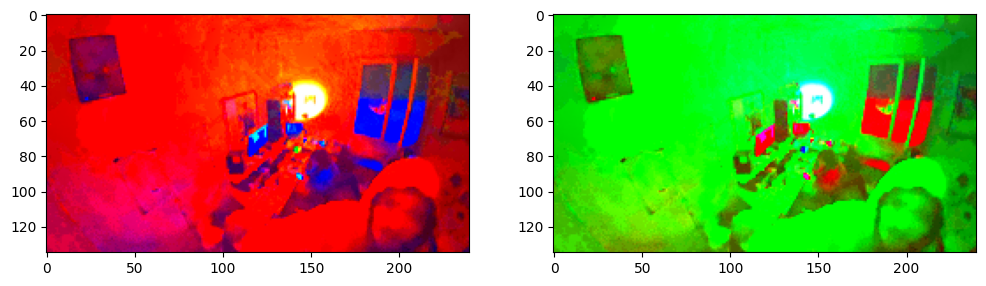

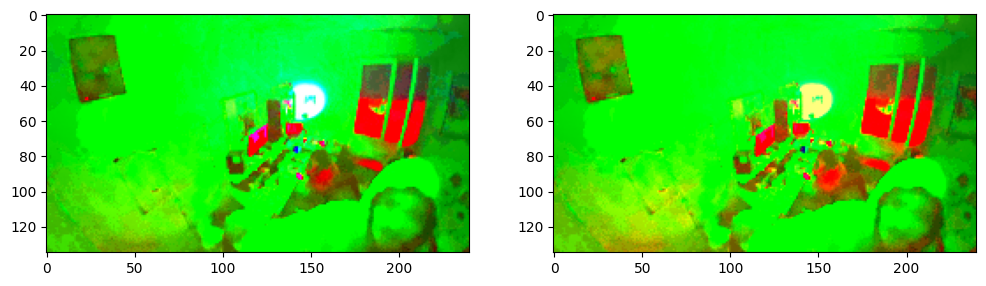

Processing Rows: 100%|██████████| 133/133 [00:00<00:00, 9041.35it/s]


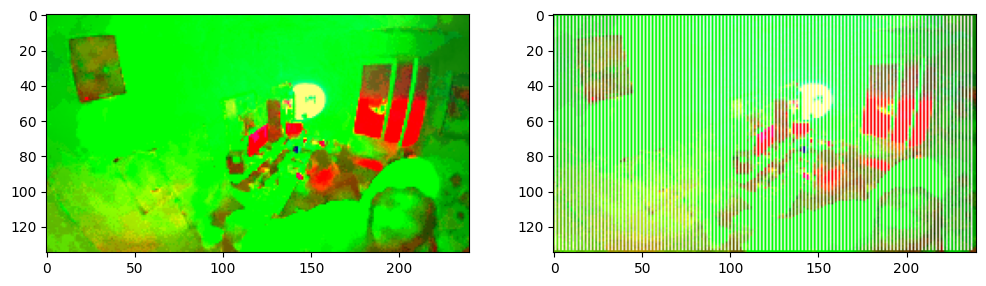

In [26]:
image2 = Image.new("RGB", (width, height))
saturation = 20
newpixel = [0, 0, 0]
for x in range(width):
  for y in range(height):
    oldpixel = image.getpixel((x, y))
    average = sum(oldpixel) // 3
    for i in range(3):
      newpixel[i] = int(
          max(
              min((oldpixel[i] - average) * saturation + average, 
                  255),
              0))
    image2.putpixel((x, y), tuple(newpixel))
showtwo(image, image2)

image3 = Image.new("RGB", (width, height))

for x in range(width):
  for y in range(height):
    oldpixel = image2.getpixel((x, y))
    newpixel = (oldpixel[2], oldpixel[0], oldpixel[1]) 
    image3.putpixel((x, y), newpixel)
showtwo(image2, image3)

image4 = Image.new("RGB", (width, height))
# rebalance levels
for x in range(width):
  for y in range(height):
    oldpixel = image3.getpixel((x, y))
    newpixel = (int(min(oldpixel[0] * 1.5, 255)),
              oldpixel[1],
              int(oldpixel[2] * 0.5)) 
    image4.putpixel((x, y), newpixel)
showtwo(image3, image4)


from tqdm import  tqdm
import numpy as np
image_np = np.array(image4, dtype=np.uint8)
for i in tqdm(range(1, image_np.shape[0] - 1), desc="Processing Rows"):
        image_np[i:-1:2, 1:-1:2] |= 0xE0  # Apply bitwise OR only on valid pixels
image5 = Image.fromarray(image_np, "RGB")
showtwo(image4, image5)


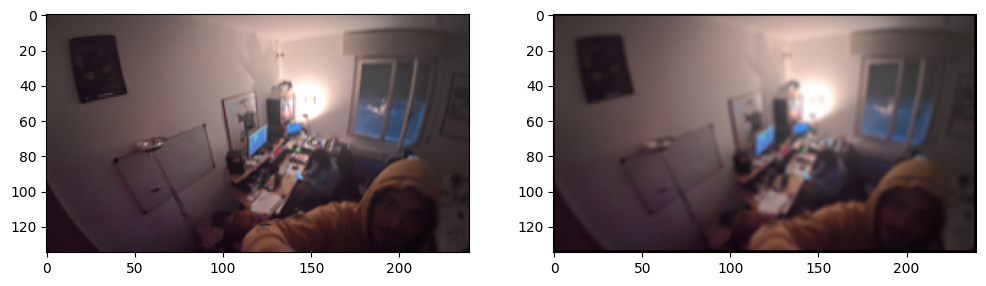

In [19]:
image2 = Image.new("RGB", (width, height))
for x in range(1, width - 1):
  for y in range(1, height - 1):
    newpixel=[0, 0, 0]
    for dx in range(-1, 2):
      for dy in range(-1, 2):
        nearby=image.getpixel((x + dx, y + dy))
        for j in range(3):
          newpixel[j] = newpixel[j] + nearby[j]
    newpixel = tuple([x // 9 for x in newpixel])
    image2.putpixel((x, y),newpixel)
showtwo(image, image2)

In [15]:
def convolve(kernel,image):
  weight = sum([sum(row) for row in kernel])
  if weight != 0:
    kernel=[[cell/weight for cell in row] for row in kernel]

  image2 = Image.new("RGB", (image.width, image.height))
  
  for x in range(1, width - 1):
    for y in range(1, height - 1):
      newpixel=[0, 0, 0]
      for dx in range(-1, 2):
        for dy in range(-1, 2):
          nearby=image.getpixel((x + dx, y + dy))
          for j in range(3):
            newpixel[j]=newpixel[j] + nearby[j] * kernel[1 + dy][1 + dx]
      newpixel=tuple(map(int, newpixel))
      image2.putpixel((x, y), newpixel)
  
  return(image2)

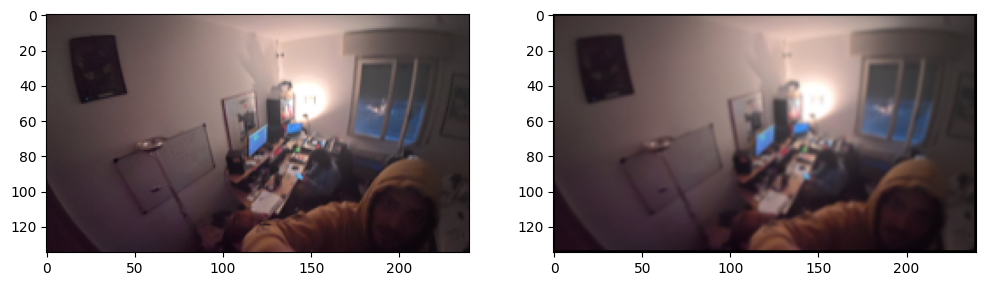

In [21]:
showtwo(image, convolve([[1, 2, 1],
                         [2, 4, 2],
                         [1, 2, 1]], image))

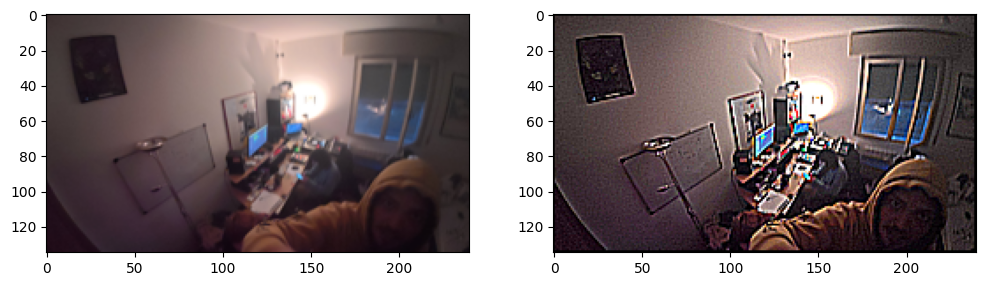

In [23]:
showtwo(image, convolve([[-1, -1, -1],
                         [-1,  9, -1],
                         [-1, -1, -1]], image))

# retain the top 5 bits and set the lowest 3 bits to zero

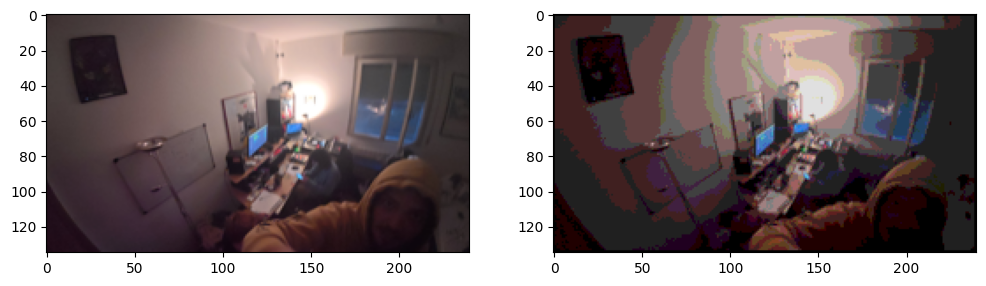

: 

In [ ]:
image2 = Image.new("RGB", (width, height))
for x in range(1, width - 1):
  for y in range(1, height - 1):
    r,g,b = image.getpixel((x,y))
    r &= 0xE0  # Apply bitwise AND
    g &= 0xE0
    b &= 0xE0
    image2.putpixel((x, y),(r,g,b))
showtwo(image, image2)